In [6]:
#import libaries

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import os

In [69]:



_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [70]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [71]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [77]:
BATCH_SIZE = 100
IMG_SHAPE = 150
train_image_generator      = ImageDataGenerator(rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      rotation_range=40,                                          
      fill_mode='nearest')  
validation_image_generator = ImageDataGenerator(rescale=1./255)  

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


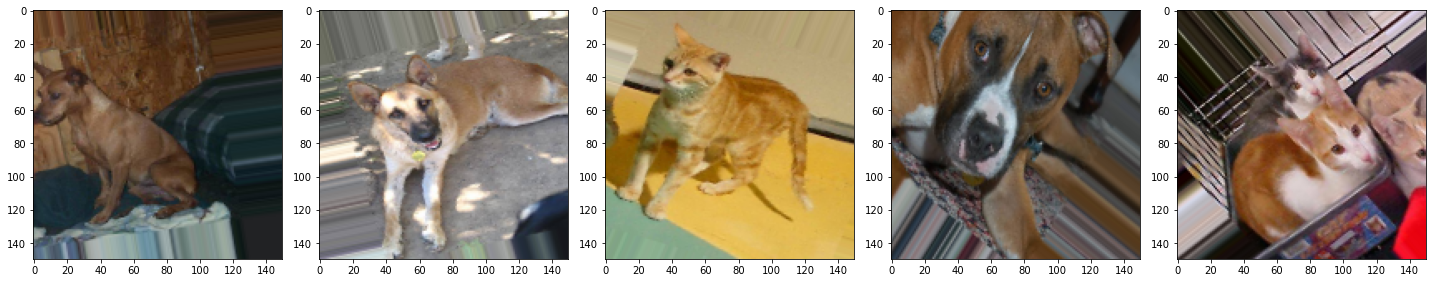

In [73]:
sample_training_images, _ = next(train_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [78]:
EPOCHS=100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100


TypeError: in user code:

    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\losses.py", line 871, in __init__  **
        super().__init__(
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\losses.py", line 225, in __init__
        super().__init__(reduction=reduction, name=name)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\losses.py", line 86, in __init__
        losses_utils.ReductionV2.validate(reduction)
    File "C:\Users\imon\anaconda3\lib\site-packages\keras\utils\losses_utils.py", line 83, in validate
        if key not in cls.all():

    TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'auto' of type 'str' instead. Error: Expected float32, but got auto of type 'str'.


In [ ]:
augumented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augumented_images)

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

NameError: name 'history' is not defined

In [59]:
test_dir = os.chdir('C:/Users/imon/Documents/400L/machine learning exercises')

In [60]:








os.listdir()

['assignment 1',
 'assignment 2',
 'assignment 3',
 'assignment 4',
 'assignment 5',
 'assignment 6',
 'cats and dogs',
 'Exercise 3',
 'Exercise 4',
 'first exercise',
 'foo.png',
 'lecture 1.pdf',
 'Lecture 9.pdf',
 'Lecture10.pdf',
 'Lecture11.pdf',
 'Lecture12.pdf',
 'Lecture2.pdf',
 'Lecture3.pdf',
 'Lecture4.pdf',
 'Lecture5.pdf',
 'Lecture6.pdf',
 'Lecture7.pdf',
 'Lecture8.pdf',
 'machine learning effects.html',
 'ML_project-main',
 'PDF Reader Elf_ PDF Editor & PDF Converter - Microsoft Store Apps.html',
 'PDF Reader Elf_ PDF Editor & PDF Converter - Microsoft Store Apps_files',
 '__MACOSX']

In [64]:
test_cat_dir = os.path.join(test_dir,'cats and dogs')
test_cats_dir = os.path.join(test_cat_dir,'cats')
test_dogs_dir = os.path.join(test_cat_dir,'dogs')
num_cats_test = len(os.listdir(test_cats_dir))
num_dogs_test = len(os.listdir(test_dogs_dir))

total_test = num_cats_test + num_dogs_test

print(num_pics)


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [62]:
test_image_generator = ImageDataGenerator(rescale=1./255)
test_data_gen = test_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=test_cat_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           )

NameError: name 'test_cat_dir' is not defined

In [84]:
model.predict(test_data_gen)

1/1 [==============================] - 0s 289ms/step


array([[0.5180164 , 0.48198363],
       [0.513495  , 0.48650497],
       [0.5169167 , 0.4830833 ],
       [0.51687634, 0.48312375],
       [0.50712264, 0.49287736],
       [0.51032686, 0.48967317],
       [0.5161891 , 0.48381084]], dtype=float32)

In [2]:
test_loss, test_accuracy = model.evaluate(test_data_gen, steps=int(np.ceil(total_test/float(BATCH_SIZE))))
print(test_accuracy)

NameError: name 'model' is not defined

In [103]:
for test_images, i in test_data_gen:
  test_images = test_data_gen
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 188ms/step


KeyboardInterrupt: 